In [8]:
import numpy as np
import random

import pollution

import matplotlib.pyplot as plt
import matplotlib
from tqdm import trange
import tqdm
import os
import imageio.v2 as imageio
import math
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import networkx as nx
import os
import math
import matplotlib.ticker as mtick
import ipywidgets as widgets
from scipy.optimize import minimize_scalar, minimize
from matplotlib.lines import Line2D
import copy
import seaborn as sns

font = {        'size'   : 20}
params = {'figure.figsize': (10, 5),
          'font.family':'sans-serif',
          'font.sans-serif':'Nimbus Sans'}
mpl.rc('font', **font)
plt.rcParams.update(params)

# Figure 1

In [ ]:
L = 30
phi=5
M=5
N=20
D=10
R=5
mu=0.5
world = pollution.World(L=L,N=N,D=D,phi=5,R=R,M_nu=0,epsilon=0,mu=mu)
im=plt.imshow(world.pollution_grid.transpose(),cmap='bwr',vmin=-1.5,vmax=1.5,origin='lower')

In [ ]:
for a in world.agents:
#     if a.type=='c':
    print(a.label,a.position)
    
world.return_agent(20)[0].position=(26,5)
# world.return_agent(6)[0].position=(17,2)
world.pollute()

In [ ]:
x_a = [a.position[0] for a in world.agents]
y_a = [a.position[1] for a in world.agents]
fig,ax=plt.subplots(figsize=(6,6))
im=ax.imshow(world.pollution_grid.transpose(),cmap='bwr',vmin=-1.5,vmax=1.5,origin='lower')
pos_d = world.return_agent(1)[0].position

pos=ax.get_position()
cax=fig.add_axes([pos.xmin+0.02,pos.ymin+0.06,0.2,0.025])
cb=fig.colorbar(im,cax=cax,orientation='horizontal')
cax.set_title('Pollution',size='medium',
              bbox=dict(facecolor='white', alpha=0.9, 
                        edgecolor='none', boxstyle='round',pad=0.01))
# for a in world.agents:
#     ax.text(a.position[0],a.position[1],a.label,ha='center',va='center',size=10)
ax.scatter(x_a,y_a,marker='o',color='yellow',s=20)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

theta=np.linspace(0,2*math.pi,200)
ax.plot(pos_d[0]+R*np.cos(theta),pos_d[1]+R*np.sin(theta),'k:',lw=1)
ax.annotate('',xy=(pos_d[0]+np.cos(3*math.pi/4)/2,pos_d[1]+np.sin(3*math.pi/4)/2),
            xytext=(pos_d[0]+R*np.cos(3*math.pi/4),
                    pos_d[1]+R*np.sin(3*math.pi/4)),
            arrowprops=dict(arrowstyle='-',lw=1))
ax.text(pos_d[0]+R*np.cos(3*math.pi/4)/2,pos_d[1]+R*np.sin(3*math.pi/4)/2,'$R$',ha='left',va='bottom',size='medium')
# ax.arrow(14,13,10*np.cos(3*math.pi/4),10*np.sin(3*math.pi/4),length_includes_head=True)#[14,14+10*np.cos(3*math.pi/4)],[13,13+10*np.cos(3*math.pi/4)])

ax.set_xlim([-0.5,29.5])
ax.set_ylim([-0.5,29.5])

fig.savefig('Intuition a1.eps', format='eps',bbox_inches='tight',dpi=300)

# Figure 2

In [ ]:
# np.random.seed(435435)
L = 50
phi=5
N=80
D=2*N//5
R=5
mu=0.5
world = pollution.World(L=L,N=N,D=D,phi=5,R=R,M_nu=1,epsilon=0,mu=mu)
time_lapse = [0]*13
time_lapse[0]=copy.deepcopy(world)
for t in range(12):
    world.step()
    time_lapse[t+1] = copy.deepcopy(world)

In [ ]:
fig,axs=plt.subplots(ncols=3,figsize=(15,6),subplot_kw=dict(box_aspect=1))
letters=['a','b','c']
for i in range(3):
    im=axs[i].imshow(time_lapse[i*5].pollution_grid.transpose(),cmap='bwr',vmin=-2,vmax=2,origin='lower')
    x_a = [a.position[0] for a in time_lapse[i*5].agents]
    y_a = [a.position[1] for a in time_lapse[i*5].agents]
    axs[i].scatter(x_a,y_a,marker='o',color='yellow',s=5)
    # for a in world.agents:
    #     ax.text(a.position[0],a.position[1],a.label,ha='center',va='center',size=6)
    axs[i].xaxis.set_visible(False)
    axs[i].yaxis.set_visible(False)
    axs[i].set_xlim([-0.5,L-0.5])
    axs[i].set_ylim([-0.5,L-0.5])
    axs[i].text(2,47,letters[i],va='top',ha='left',
                bbox=dict(boxstyle='round', fc="w",pad=0.1,ec='w'),weight='bold')
    axs[i].text(47,2,f't = {i*5}',va='bottom',ha='right',
                bbox=dict(boxstyle='round', fc="w",pad=0.1,ec='w'))
fig.savefig("snapshots_lowercasepanels.eps",bbox_inches='tight',format='eps')

# Figure 3

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


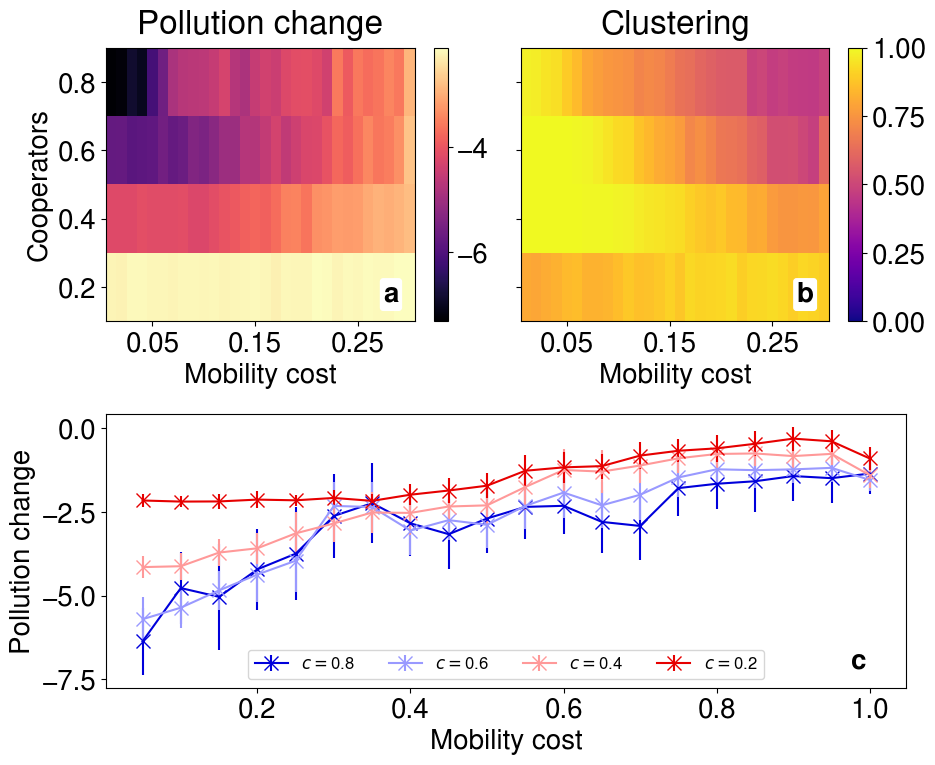

In [6]:
 # Three panels!
start=1
N=50
D=[N//5,2*N//5,3*N//5,4*N//5]
mu_full=np.arange(0,1.05,0.05)
mu=np.arange(0,0.31,0.01)
runs=50

pcp=np.loadtxt('../Data/Fixed Strategy/N50pcp_fin_zoom.csv').reshape(len(D),len(mu),runs)
pcp_full=np.loadtxt('../Data/Fixed Strategy/pcp_fin.csv').reshape(len(D),len(mu_full),runs)
cc=np.loadtxt('../Data/Fixed Strategy/N50cc_fin_zoom.csv').reshape(len(D),len(mu),runs)
D_corners = [0.1,0.3,0.5,0.7,0.9]
# mu_corners = np.diff(np.array([-0.05]+list(mu)+[1.05]))/2 + np.arange(-0.05,1.05,0.05)
mu_corners = np.diff(np.array([-0.01]+list(mu)+[0.31]))/2 + np.arange(-0.01,0.31,0.01)
mu_mesh,D_mesh = np.meshgrid(mu_corners,D_corners)

fig = plt.figure(figsize=(10,8))
#,ncols=3,
#                        sharex=True,
#                        subplot_kw=dict(box_aspect=1))
axs=[plt.subplot(2,2,1),plt.subplot(2,2,2),plt.subplot(2,1,2)]
axs[1].get_shared_y_axes().join(axs[0], axs[1])
axs[1].get_shared_x_axes().join(axs[0], axs[1])
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.075,
                    hspace=0.34)
c_labels = ['Pollution change', 'Clustering']
metrics = [pcp,cc]
cmaps = ['magma','plasma']

vmins=[metrics[0][:,1:,:].mean(axis=-1).min(),0]
vmaxs=[metrics[0][:,1:,:].mean(axis=-1).max(),1]
letters=['a','b','c']
labels= ['$c=$'+str(i) for i in [0.8,0.6,0.4,0.2]]
line_colors = [matplotlib.cm.get_cmap('seismic_r')(x) for x in [0.8,0.6,0.4,0.2]]
for i in range(4):
#     axs[2].errorbar(mu[1:],np.mean(pcp[i,1:,:],axis=-1),
#                         yerr=pcp[i,1:,:].std(axis=-1),label=labels[i])
    axs[2].errorbar(mu_full[1:],np.mean(pcp_full[i,1:],axis=-1),
                    yerr=pcp_full[i,1:].std(axis=-1),label=labels[i],
                    color=line_colors[i],marker='x',ms=10)
axs[2].text(axs[2].get_xlim()[0]+0.95*np.diff(axs[2].get_xlim()),
            axs[2].get_ylim()[0]+0.05*np.diff(axs[2].get_ylim()),
            letters[2],va='bottom',ha='right',
            bbox=dict(boxstyle='round', fc="w",pad=0.1,ec='w'),weight='bold')
axs[2].set_ylabel("Pollution change")
axs[2].set_xlabel("Mobility cost")
axs[2].legend(loc='lower center',ncol=4,fontsize=12)
axs[0].set_ylabel("Cooperators")
axs[1].set_yticklabels([])

for i in range(2):
    im=axs[i].pcolormesh(mu_mesh,1-D_mesh,metrics[i].mean(axis=-1),
                         cmap=cmaps[i],vmin=vmins[i],vmax=vmaxs[i])
    axs[i].set_yticks([0.2,0.4,0.6,0.8])
    cb=fig.colorbar(im,ax=axs[i])
    axs[i].set_title(c_labels[i],pad=10)
    axs[i].text(axs[i].get_xlim()[0]+0.95*np.diff(axs[i].get_xlim()),
                axs[i].get_ylim()[0]+0.05*np.diff(axs[i].get_ylim()),
                letters[i],va='bottom',ha='right',
                bbox=dict(boxstyle='round', fc="w",pad=0.1,ec='w'),weight='bold')
    axs[i].set_xticks([0.05,0.15,0.25])
    axs[i].set_xlim([start/100-0.005,0.305])
    axs[i].set_xlabel("Mobility cost")
    
        
fig.savefig(f"../Figures/Fixed Strategy/3plots_2heatmaps_1lineplot_lowercasepanels.eps",bbox_inches='tight',format='eps')

# Figure 4

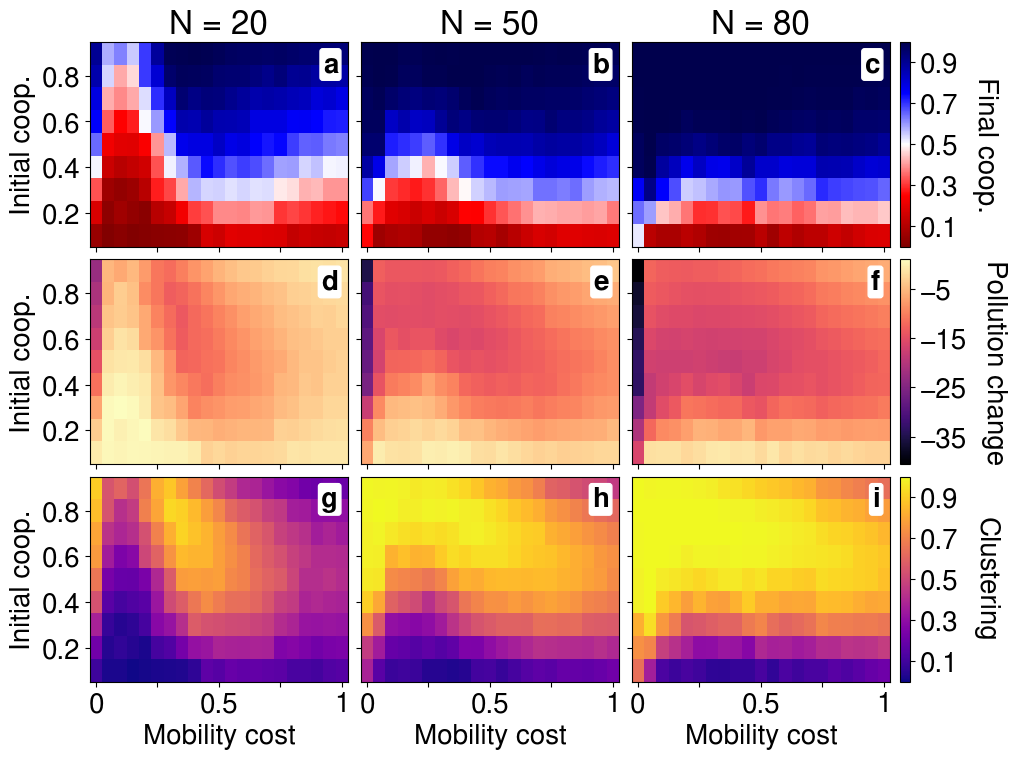

In [14]:
mu=np.arange(0,1.05,0.05)
D=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
L = 50
A = math.pi*(5**2)
runs=200
folder = '../Data/Imitation/'
N = [20,50,80]
pcp = np.loadtxt(folder+'pcp_all.csv').reshape(len(N),len(D),len(mu),runs)
cc = np.loadtxt(folder+'cc_all.csv').reshape(len(N),len(D),len(mu),runs)
c_rate = np.loadtxt(folder+'c_rate_all.csv').reshape(len(N),len(D),len(mu),runs)

D_corners = np.array([0]+D)+0.05
mu_corners = np.diff(np.array([-0.05]+list(mu)+[1.05]))/2 + np.arange(-0.05,1.05,0.05)
mu_mesh,D_mesh = np.meshgrid(mu_corners,D_corners)
mu_grid,D_grid = np.meshgrid(mu,D)

fig,axs=plt.subplots(nrows=3,ncols=3,sharex=True,sharey=True,figsize=(10,8))
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.05,
                    hspace=0.06)
c_rate_lims = [np.min(c_rate.mean(axis=-1)),np.max(c_rate.mean(axis=-1))]
cc_lims = [np.min(cc.mean(axis=-1)),np.max(cc.mean(axis=-1))]
pcp_lims = [np.min(pcp[:,:,:,:].mean(axis=-1)),np.max(pcp.mean(axis=-1))]

ims=[0,0,0]
for i in range(3):
    axs[0,i].set_title(f"N = {N[i]}",size='large')
    ims[0]=axs[0,i].pcolormesh(mu_mesh,1-D_mesh,np.mean(c_rate[i],axis=-1),
                        cmap='seismic_r',vmin=0,vmax=1)
    ims[1]=axs[1,i].pcolormesh(mu_mesh,1-D_mesh,np.mean(pcp[i],axis=-1),
                        cmap='magma',vmin=pcp_lims[0],vmax=pcp_lims[1])
    ims[2]=axs[2,i].pcolormesh(mu_mesh,1-D_mesh,np.mean(cc[i],axis=-1),vmin=0,vmax=1,cmap='plasma')
    
    axs[2,i].set_xticks([0,0.25,0.5,0.75,1])
    axs[2,i].set_xticklabels([0,'',0.5,'',1])
    axs[i,0].set_yticks([0.2,0.4,0.6,0.8])
    axs[i,0].set_yticklabels([0.2,0.4,0.6,0.8])
    
cb=[0,0,0]
# c_labels=[r'$\bar{c}(T)$',r'$\bar{\Delta}\hat{P}$',r'$\bar{\kappa}$']
c_labels=['Final coop.','Pollution change','Clustering']
letters=['a','b','c','d','e','f','g','h','i']
ctick_vals=[np.arange(0.1,1,0.2),np.arange(-35,0,10),np.arange(0.1,1,0.2)]
for j in range(3):
#     axs[j,2].set_visible(False)
    pos = axs[j,-1].get_position()
    cax = fig.add_axes([pos.xmax+0.01,pos.ymin,
                       0.01,pos.ymax-pos.ymin])    
    cb[j]=fig.colorbar(ims[j],cax=cax,ticks=ctick_vals[j])
    cb[j].set_label(label=c_labels[j],rotation=-90,va='bottom',ha='center',labelpad=10)
#     cb[j].ax.tick_params(labelsize=10)
    
    axs[j,0].set_yticks([0.2,0.4,0.6,0.8])
    axs[j,0].set_yticklabels([0.2,0.4,0.6,0.8])
    axs[j,0].set_ylabel("Initial coop.")
    axs[-1,j].set_xlabel("Mobility cost")
    for i in range(3):
        axs[i,j].text(0.985,0.85,letters[i*3+j],va='center',ha='right',
                      bbox=dict(boxstyle='round', fc="w",pad=0.1,ec='w'),weight='bold')
    
ax_outer=fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel("common X",fontsize='medium')
# plt.ylabel(r"Initial coop.")#,size='large')
# # plt.xlabel("Mobility cost")#,size='large')
# fig.savefig("Figures/Imitation/single_cost.png",bbox_inches='tight')
fig.savefig("../Figures/Imitation/single_cost_lowercasepanels.eps",format='eps',bbox_inches='tight')

# Figure 5

In [17]:
N=[20,50,80]
mu_means = [0.4,0.8]
folder = f'../Data/Imitation/Two Costs/'

runs=200
D = np.arange(0.1,1,0.1).tolist()
mu_m=np.arange(0,1.05,0.05)

pcp=np.stack([np.stack([np.loadtxt(folder+f'N{n}/0{mu_mean*10}pcp.csv').reshape((len(D),len(mu_m),runs)) 
              for n in N]) for mu_mean in mu_means])
cc=np.stack([np.stack([np.loadtxt(folder+f'N{n}/0{mu_mean*10}cc.csv').reshape((len(D),len(mu_m),runs)) 
             for n in N]) for mu_mean in mu_means])
c_rate=np.stack([np.stack([np.loadtxt(folder+f'N{n}/0{mu_mean*10}c_rate.csv').reshape((len(D),len(mu_m),runs))/n 
                 for n in N]) for mu_mean in mu_means])
type_cc=np.stack([np.stack([np.loadtxt(folder+f'N{n}/0{mu_mean*10}type_cc.csv').reshape((2,2,len(D),len(mu_m),runs)) 
                  for n in N]) for mu_mean in mu_means])
minority_c_rate=np.stack([np.stack([np.loadtxt(folder+f'N{n}/0{mu_mean*10}minority_c_rate.csv').reshape((len(D),
                                                                                   len(mu_m),
                                                                                   runs))/n for n in N])
                          for mu_mean in mu_means])

for i in range(len(mu_means)):
    minority_c_rate[i,:,:,mu_m==mu_means[i],:] *= 0.2

D_corners = np.array([0]+D)+0.05
mu_corners = np.diff(np.array([-0.05]+list(mu_m)+[1.05]))/2 + np.arange(-0.05,1.05,0.05)
mu_mesh,D_mesh = np.meshgrid(mu_corners,D_corners)
mu_grid,D_grid=np.meshgrid(mu_m,D)

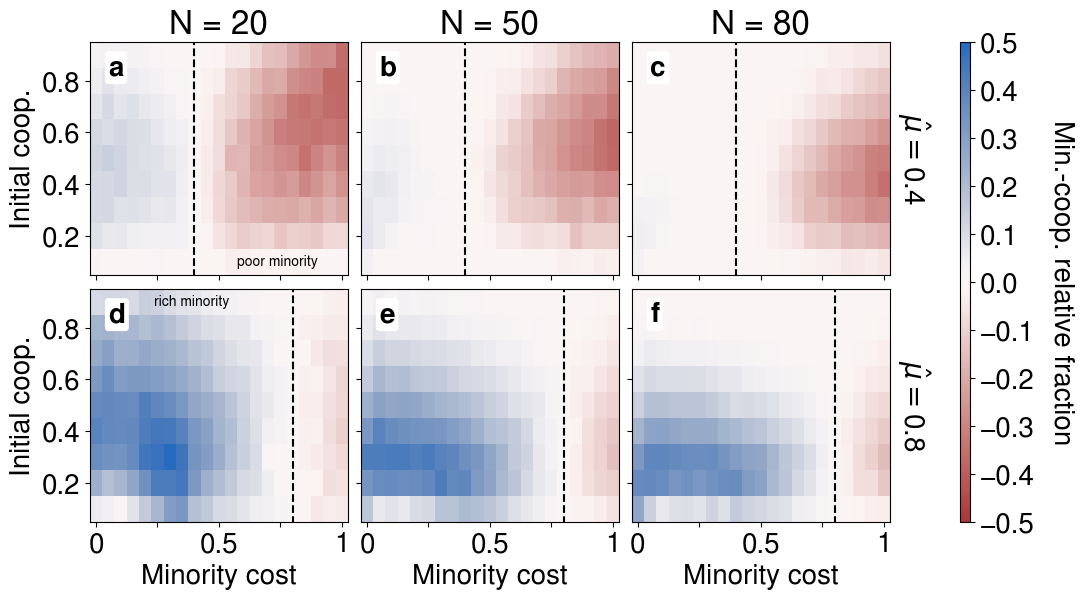

In [19]:
fig,axs=plt.subplots(nrows=2,ncols=3,sharex=True,sharey=True,figsize=(10,6))
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.05,
                    hspace=0.06)

cmap = sns.color_palette("vlag_r", as_cmap=True)
vmin = min([-0.5,(minority_c_rate/0.2-c_rate).mean(axis=-1).min()])
vmax = max([0.5,(minority_c_rate/0.2-c_rate).mean(axis=-1).max()])
for j in range(len(N)):
    axs[0,j].set_title(f"N = {N[j]}")
    for i in range(len(mu_means)):
        im=axs[i,j].pcolormesh(mu_mesh,1-D_mesh,
                               (minority_c_rate[i,j]/0.2-c_rate[i,j]).mean(axis=-1),
                               cmap=cmap,vmin=vmin,vmax=vmax)
#         im=axs[i,j].pcolormesh(mu_mesh,1-D_mesh,
#                                np.log(minority_c_rate[i,j].mean(axis=-1)/0.2/c_rate[i,j].mean(axis=-1)),
#                                cmap=cmap,vmin=-0.85,vmax=0.85)
        axs[i,j].plot([mu_means[i]]*2,[0,1],'k--')
        axs[i,j].set_ylim([0.05,0.95])
    
    axs[-1,j].set_xticks([0,0.25,0.5,0.75,1])
    axs[-1,j].set_xticklabels([0,'',0.5,'',1])
    axs[-1,j].set_xlabel('Minority cost')
    
cb=[0]*len(mu_means)
letters=['a','b','c',
         'd','e','f']
c_labels=['$\hat{\mu} = $'+f'{mu}' for mu in mu_means]
for i in range(len(mu_means)):
    axs[i,-1].yaxis.set_label_position("right")
    axs[i,-1].set_ylabel(c_labels[i],rotation=-90,ha='center',va='bottom')
    axs[i,0].set_yticks([0.2,0.4,0.6,0.8])
    axs[i,0].set_yticklabels([0.2,0.4,0.6,0.8])
    axs[i,0].set_ylabel('Initial coop.')
    for j in range(3):
        axs[i,j].text(0.05,0.9,letters[i*3+j],va='top',ha='left',
                      bbox=dict(boxstyle='round', fc="w",pad=0.1,ec='w'),weight='bold')
    
axs[0,0].text(0.7375,0.1,'poor minority',fontsize=10,ha='center',va='center')
axs[1,0].text(0.3875,0.9,'rich minority',fontsize=10,ha='center',va='center')
    
ax_outer=fig.add_subplot(111, frameon=False)
pos = ax_outer.get_position()
cax = fig.add_axes([pos.xmax+0.07,pos.ymin,
                    0.01,pos.ymax-pos.ymin]) 
cb=fig.colorbar(im,cax=cax,ticks=np.arange(-0.5,0.6,0.1))
cb.set_label(label='Min.-coop. relative fraction',
             size='medium',rotation=-90,va='bottom',ha='center',labelpad=10)
ax_outer.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
fig.savefig(f"../Figures/Imitation/two_cost_minority_proportions_text_lowercasepanels.eps",format='eps',bbox_inches='tight')

# Supplementary Figures

## Figure S1

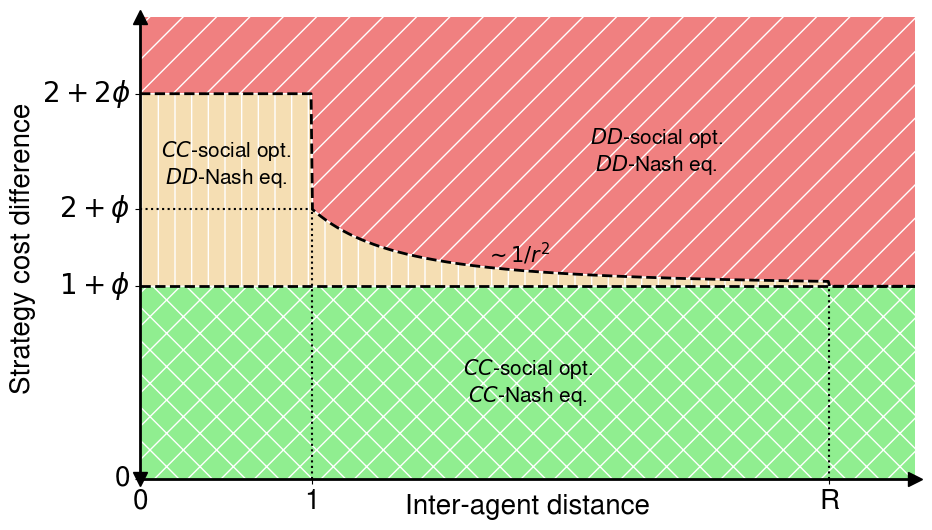

In [34]:
phi = 1.5
R = 4
r = np.linspace(0,8,1000)
defection_dom = (1+phi)*np.ones_like(r)
social_opt = 2*(1+phi)*np.ones_like(r)
social_opt[(r>1)] = defection_dom[(r>1)] + 1/r[(r>1)]**2
social_opt[r>R] = defection_dom[r>R]

fig,ax=plt.subplots(figsize=(10,6))
# bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2',alpha=0.8)

ax.plot(r,defection_dom,c='k',lw=2,ls='--')
ax.plot(r,social_opt,c='k',lw=2,ls='--')

ax.plot([0,1],[2+phi]*2,c='k',ls=':')
ax.plot([1]*2,[0,2+phi],c='k',ls=':')
ax.plot([R]*2,[0,1+phi],c='k',ls=':')

ax.set_xlim([0,R+0.5])
# ax.set_ylim([phi,3+2*phi])
ax.set_ylim([0,3+2*phi])

ax.set_xticks([0,1,R])
ax.set_yticks([0,1+phi,2+phi,2+2*phi])
ax.set_xticklabels([0,1,'R'])
ax.set_yticklabels([0,r'$1+\phi$',r'$2+\phi$',r'$2+2\phi$'],va='center')

# ax.set_yticks([1,2,3,4])
# ax.set_yticklabels(['',r'$1+\phi$',r'$2+\phi$',r'$2+2\phi$'],rotation=90,va='center')

# ax.set_xticks([0,1,2,3,4,5])
# ax.set_xticklabels(['',1,2,'','R',''])
# ax.tick_params(axis='x',direction='in',pad=-30)

ax.set_xlabel('Inter-agent distance',va='bottom')
ax.set_ylabel('Strategy cost difference')

ax.fill_between([0,8],[1+phi]*2,color='lightgreen',
                hatch='X',edgecolor="w")#,alpha=0.2)
ax.fill_between(r,social_opt,[4+2*phi]*len(r),color='lightcoral',
                hatch='/',edgecolor="w")#,alpha=0.2)
ax.fill_between(r,social_opt,defection_dom,color='wheat',
                hatch='|',edgecolor="w")#,alpha=0.2)

ax.text(2,1.25+phi,r'$\sim 1/r^2$',fontsize=15,va='bottom',ha='left')
ax.text((0.5+R)/2,phi/2+0.5,'$CC$-social opt.\n$CC$-Nash eq.',ha='center',
        va='center',fontsize=15)
ax.text(0.5,1.5+1.5*phi,'$CC$-social opt.\n$DD$-Nash eq.',ha='center',
        va='bottom',fontsize=15)
ax.text((2+R)/2,(4+3*phi)/2,'$DD$-social opt.\n$DD$-Nash eq.',ha='center',
        va='center',fontsize=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set(lw=2)
ax.spines['bottom'].set(lw=2)
ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
        transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
        transform=ax.get_xaxis_transform(), clip_on=False)
ax.plot((0), (0), ls="", marker="v", ms=10, color="k",
        transform=ax.get_xaxis_transform(), clip_on=False)
# fig.savefig("social dilemma phase diag.eps",bbox_inches='tight',format='eps')

## Figure S2

In [37]:
def f_dd(x,par):
    mu,x1,R,_ = par
    res = (np.abs(x)<1)*1 + (np.abs(x-x1)<1)*1 + np.abs(x-x1)*mu
    if (np.abs(x)>=1)&(np.abs(x)<R):
        res += 1/x**2
    if (np.abs(x-x1)>=1)&(np.abs(x-x1)<R):
        res += 1/(x-x1)**2
    return res

def f_dc(x,par):
    mu,x1,R,phi = par
    res = (np.abs(x)<1)*1 - (np.abs(x-x1)<=1)*phi + np.abs(x-x1)*mu
    if (np.abs(x)>=1)&(np.abs(x)<R):
        res += 1/x**2
    return res

def f_cd(x,par):
    mu,x1,R,phi = par
    res = (np.abs(x)<=1)*(-1*phi) + (np.abs(x-x1)<1)*1 + np.abs(x-x1)*mu
    if (np.abs(x-x1)>=1)&(np.abs(x-x1)<R):
        res += 1/(x-x1)**2
    return res

def f_cc(x,par):
    mu,x1,R,phi = par
    res = (np.abs(x)<=1)*(-1*phi) + (np.abs(x-x1)<=1)*(-1*phi) + np.abs(x-x1)*mu
    return res

In [38]:
mu = np.linspace(0.001,10,4000)
R=5
phi=5
gmin_dd=[0]*5
gmin_dc=[0]*5
gmin_cd=[0]*5
gmin_cc=[0]*5
for x1 in trange(1,6):
    gmin_dd[x1-1] = np.array([minimize_scalar(f_dd,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
    gmin_dc[x1-1] = np.array([minimize_scalar(f_dc,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
    gmin_cd[x1-1] = np.array([minimize_scalar(f_cd,method='bounded',
                                        bounds=(-R-0.5,R+x1+0.5),
                                        args=[Mu,x1,R,phi]).x for Mu in mu])
    gmin_cc[x1-1] = np.ones(len(mu))*x1
#     gmin_cc[x1-1] = np.array([minimize_scalar(f_cc,method='bounded',
#                                         bounds=(-R-0.5,R+x1+0.5),
#                                         args=[Mu,x1,R,phi]).x for Mu in mu])
gmin_cc[0]=np.ones(len(mu))
gmin_cc[1] = np.array([1]*len(mu[mu<=phi/(2-1)])+[2]*len(mu[mu>phi]))


100%|█████████████████████████████████████████████| 5/5 [00:40<00:00,  8.17s/it]


/home/jbara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


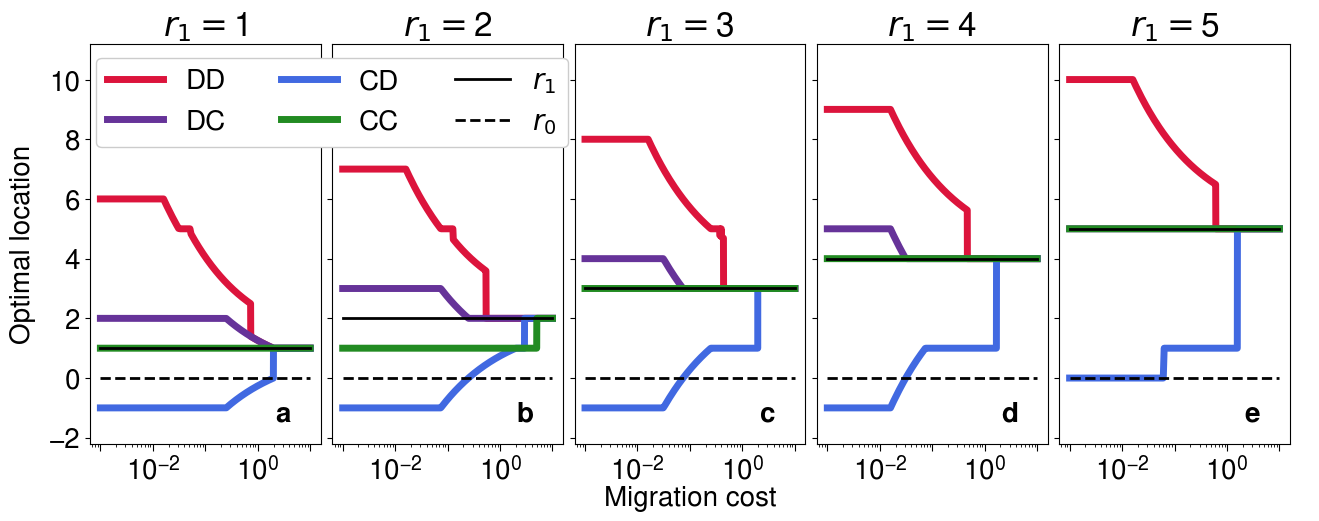

In [41]:
fig,axs=plt.subplots(figsize=(15,5),ncols=5,sharey=True,sharex=True)
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.05,
                    hspace=0.06)
letters=['a','b','c','d','e']
for i in range(axs.shape[0]):
    shift=0
    l2=axs[i].plot(mu,gmin_dd[i]-shift,c='crimson',label='DD',lw=5)
    l3=axs[i].plot(mu,gmin_dc[i]-shift,c='rebeccapurple',label='DC',lw=5)
    l4=axs[i].plot(mu,gmin_cd[i]-shift,c='royalblue',label='CD',lw=5)
    l5=axs[i].plot(mu,gmin_cc[i]-shift,c='forestgreen',label='CC',lw=5)
    l1=axs[i].plot([0.001,10],[i+1-shift,i+1-shift],'k',label='$r_1$',lw=2)
    l6=axs[i].plot([0.001,10],[-shift,-shift],'k--',label='$r_0$',lw=2)
    axs[i].set_title(f'$r_1=${(i+1)}')
#     xlim = ax.get_xlim()
#     axs[i].legend(fontsize=15)
#     axs[i].set_ylim([-6.5,6.5])
    
    axs[i].set_ylim([-2.2,11.2])
#     axs[i].set_xlim([0.01,4.2])
    axs[i].set_xscale('log')
    locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
    locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9),numticks=12)
    axs[i].xaxis.set_major_locator(locmaj)
    axs[i].xaxis.set_minor_locator(locmin)
    axs[i].xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    axs[i].tick_params(axis='x', which='major', length=5)
    axs[i].text(3,-1.2,letters[i],va='center',ha='center',
                bbox=dict(boxstyle='round', fc="w",pad=0.1,ec='w'),weight='bold')
    for label in axs[i].xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
#     axs[i].set_xticklabels([0.01,1])
#     axs[i].set_xticks([1e-2,1e1])
# axs[0].legend(ncol=6,loc='upper left')
ax_outer=fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# plt.xlabel("common X",fontsize='medium')
plt.ylabel("Optimal location")
plt.xlabel("Migration cost")
fig.legend([l2,l3,l4,l5,l1,l6],labels=['DD','DC','CD','CC','$r_1$','$r_0$'],ncol=3,loc='upper left',
           bbox_to_anchor=(0.095, 0.9),framealpha=1)
# fig.legend([l2,l3,l4,l5,l1,l6],labels=['DD','DC','CD','CC','$r_1$','$r_0$'],ncol=3,loc='lower left',
#            bbox_to_anchor=(0.095, 0.085),framealpha=1)
fig.savefig(f"Global min 5plots_lowercasepanels.eps",format='eps',bbox_inches='tight')
# fig.savefig(f"Global min 5plots.png",bbox_inches='tight')

## Figure S4

In [46]:
def P(x,R=10,x0=0):
    if type(x)!=np.ndarray:
        if np.abs(x-x0)<=1:
            return 1
        elif np.abs(x-x0)<=R:
            return 1/(x-x0)**2
        else:
            return 0
    else:
        p = np.zeros_like(x)
        p[np.abs(x-x0)<=1] = 1
        p[(np.abs(x-x0)>1)&(np.abs(x-x0)<=R)]=1/(x[(np.abs(x-x0)>1)&(np.abs(x-x0)<=R)]-x0)**2
        return p
        

def m_cost(x,mu=1,x0=1):
    if type(x)!=np.ndarray:
        if x<x0:
            return mu*(x0-x)
        else:
            return mu*(x0-1)
    else:
        p=np.zeros_like(x)
        p[x<x0]=mu*(x0-x[x<x0])
        p[x>=x0]=mu*(x[x>=x0]-x0)
        return p

def clean(x,phi=5,x0=1):
    if type(x)!=np.ndarray:
        if (x>=x0-1) & (x<=x0+1):
            return -phi
        else:
            return 0
    else:
        p=np.zeros_like(x)
        p[(x>=x0-1) & (x<=x0+1)] = -phi
        return p
    
def total_cost(x,mu=1,phi=5,R=10,x0=1):
    return P(x,R=R)+m_cost(x,mu=mu,x0=1)+clean(x,phi=phi,x0=1)

def min_under_mu(mu,x=np.linspace(-20,20,1000)):
#     x=np.linspace(-20,20,10000)
    y= np.array([total_cost(x[i],mu=mu) for i in range(len(x))])
    return x[np.argmin(y)]

# Drawing the stationary points of total_cost as a phase diagram against mu
    # 1D1C
def plot_stat_points_1d1c(mu,phi=5,R=10,ax=None,
                          gminc='forestgreen',glw=3,gminlab='G-Min',
                          minc='royalblue',minls='-',minlab='L-Min',
                          maxc='crimson',maxls=':',maxlab='Max',
                          disc='royalblue',disls='--',dislab='D-Min',
                          legend_loc='lower right',scale='lin',mobile='c',
                          legend=True,title_text=True):
    # Stationary points for the one-defector-one-cooperator case 
        # with D at the origin and C at x=1
        # mobile controls who will move
    def add_arrow(line, position=None, direction='right', size=15, color=None):
        """
        add an arrow to a line.

        line:       Line2D object
        position:   x-position of the arrow. If None, mean of xdata is taken
        direction:  'left' or 'right'
        size:       size of the arrow in fontsize points
        color:      if None, line color is taken.
        """
        if color is None:
            color = line.get_color()

        xdata = line.get_xdata()
        ydata = line.get_ydata()

        if position is None:
            position = xdata.mean()
        # find closest index
        start_ind = np.argmin(np.absolute(xdata - position))
        if direction == 'right':
            end_ind = start_ind + 2
        else:
            end_ind = start_ind - 2

        line.axes.annotate('',
            xytext=(xdata[start_ind], ydata[start_ind]),
            xy=(xdata[end_ind], ydata[end_ind]),
            arrowprops=dict(arrowstyle="simple", color=color),
            size=size
        )
    
    if ax == None:
        fig,ax=plt.subplots(figsize=(10,8))
#     if min(mu)>0:
#     # Move left y-axis and bottim x-axis to centre, passing through (0,0)
#         ax.spines['left'].set_position(('data',0))

#     # Eliminate upper and right axes
#     ax.spines['right'].set_color('none')
#     ax.spines['top'].set_color('none')
#     ax.spines['bottom'].set_position(('data',0))
    ax.set_xlabel("Migration, $\mu$")#,loc='right',labelpad=-50)
    ax.set_ylabel("Position, $x_*$")#,loc='top',labelpad=-10)
    ax.set_xlim([min(mu),max(mu)])
    ax.set_ylim([-R-1/2,R+1/2])
        
    mu_a = mu[mu<0]
    mu_b = mu[(mu>=0)&(mu<2/(R**3))]
    mu_c = mu[(mu>=2/(R**3))&(mu<1/4)]
    mu_d = mu[(mu>=1/4)&(mu<2)]
    mu_e = mu[(mu>=2)]
    
    # Maxima same for both C&D
    ax.plot(mu[mu<=0],[1]*len(mu[mu<=0]),c=maxc,ls=maxls)
    ax.plot(mu[(mu>=0)&(mu<=2)],[-1]*len(mu[(mu>=0)&(mu<=2)]),c=maxc,ls=maxls)
    
    ax.plot(mu_b,[R]*len(mu_b),c=minc,ls=minls)
    ax.plot(mu_b,[-R]*len(mu_b),c=minc,ls=minls)
    ax.plot(mu[mu>=2/R**3],[R]*len(mu[mu>=2/R**3]),c=disc,ls=disls,
            label=dislab)
    ax.plot(mu[mu>=2/R**3],[-R]*len(mu[mu>=2/R**3]),c=disc,ls=disls)
    
    ax.plot(mu_c,np.cbrt(2/mu_c),c=minc,ls=minls,label=minlab)
    ax.plot(mu_c,-np.cbrt(2/mu_c),c=minc,ls=minls)
    ax.plot(mu_d,-np.cbrt(2/mu_d),c=minc,ls=minls)
    
    ax.plot(mu_d,np.cbrt(2/mu_d),c=minc,ls=minls)
    
    if mobile=='c':
        ax.plot(mu,[0]*len(mu),c=disc,ls=disls)
        g1=ax.plot(mu[mu<=0.25],[2]*len(mu[mu<=0.25]),c=gminc,lw=glw)[0]
        g2=ax.plot(mu_b,[2]*len(mu_b),c=gminc,lw=glw)[0]
        g3=ax.plot(mu_d,np.cbrt(2/mu_d),c=gminc,lw=glw)[0]
        g4=ax.plot(mu_e,[1]*len(mu_e),c=gminc,lw=glw)[0]
        add_arrow(g1,size=20)
        add_arrow(g3,size=20)    
        add_arrow(g4,size=20)
    elif mobile=='d':
        mu_disc=2/3**(3/2)
        ax.plot(mu,[0]*len(mu),c=minc,ls=minls)
        g1=ax.plot(mu[mu<=0.25],[2]*len(mu[mu<=0.25]),c=gminc,lw=glw)[0]
        g2=ax.plot(mu[(mu>=0.25)&(mu<=mu_disc)],
                   np.cbrt(2/mu[(mu>=0.25)&(mu<=mu_disc)]),
                   lw=glw,c=gminc)[0]
        g3=ax.plot(mu[(mu>=mu_disc)],
                   [0]*len(mu[(mu>=mu_disc)]),
                   lw=glw,c=gminc)[0]
        add_arrow(g1,size=20)
        add_arrow(g2,size=20)
        add_arrow(g3,size=20)
        ax.scatter([mu_disc]*2,
                   [0,np.cbrt(2/mu_disc)],
                   c=gminc,marker='o',s=10)
    
    if legend:
        gline = Line2D([0], [0], color=gminc, lw=glw, label=gminlab,marker='>',ms=10)
        mline = Line2D([0], [0], color=minc, ls=minls, label=minlab)
        dline = Line2D([0], [0], color=disc, ls=disls, label=dislab)
        maxline = Line2D([0], [0], color=maxc, ls=maxls, label=maxlab)
        ax.legend(handles=[maxline,dline,mline,gline],loc=legend_loc)
    elif title_text:
        if mobile=='c':
            title='Mobile Cooperator' 
        elif mobile=='d':
            title='Mobile Defector'
        else: 
            title='Mobile ?'
        ax.text(0.95,0.91, title, fontsize = 15, 
                bbox = dict(facecolor = 'white',
                            edgecolor='black',
                            boxstyle='round,pad=0.5'),
                ha='right',va='top',
                transform = ax.transAxes)
    if scale=='log':
        ax.set_xscale('log')
        ax.set_xlim([min(mu[mu>0]),max(mu)])
        ax.set_xticks([0.01,2/R**3,0.1,0.25,1,2])
        ax.set_xticklabels([0.01,r'$2R^{-3}$',0.1,0.25,1,2])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


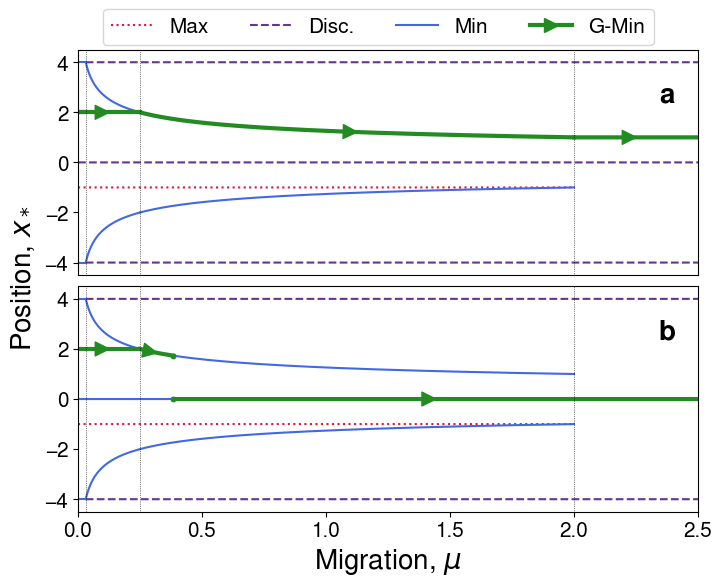

In [52]:
fig,axs=plt.subplots(figsize=(8,6),nrows=2,sharex=True)
fig.subplots_adjust(hspace=0.05)
mu = np.linspace(0,2.5,10000)
R=4
gminc,minc,disc,maxc=('forestgreen','royalblue','rebeccapurple','crimson')
dislab,minlab,maxlab,gminlab=('Disc.','Min','Max','G-Min')
glw=3
minls,maxls,disls=('-',':','--')

plot_stat_points_1d1c(mu,ax=axs[0],R=R,
                      gminc=gminc,minc=minc,maxc=maxc,disc=disc,
                      dislab=dislab,minlab=minlab,
                      maxlab=maxlab,gminlab=gminlab,
                      scale='lin',
                      mobile='c',legend=False,title_text=False)
plot_stat_points_1d1c(mu,ax=axs[1],R=R,
                      gminc=gminc,minc=minc,maxc=maxc,disc=disc,
                      dislab=dislab,minlab=minlab,
                      maxlab=maxlab,gminlab=gminlab,
                      scale='lin',
                      mobile='d',legend=False,title_text=False)

axs[0].axes.get_xaxis().set_visible(False)
gline = Line2D([0], [0], color=gminc, lw=glw, label=gminlab,marker='>',ms=10)
mline = Line2D([0], [0], color=minc, ls=minls, label=minlab)
dline = Line2D([0], [0], color=disc, ls=disls, label=dislab)
maxline = Line2D([0], [0], color=maxc, ls=maxls, label=maxlab)
fig.legend(handles=[maxline,dline,mline,gline],
           bbox_to_anchor=(0.5,0.965),loc='upper center',ncol=4,fontsize=15)
letters=['a','b']
for i,ax in enumerate(axs):
    ax.plot([2,2],[-4.5,4.5],'k:',lw=0.5)
    ax.plot([0.25,0.25],[-4.5,4.5],'k:',lw=0.5)
    ax.plot([2/(R**3)]*2,[-R-1,R+1],'k:',lw=0.5)
    ax.set_ylabel('')
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.text(0.95,0.8, letters[i] ,va='center',ha='center',
                bbox=dict(boxstyle='round', fc="w",pad=0.1,ec='w'),weight='bold',
                transform = ax.transAxes)
fig.text(0.04, 0.5, 'Position, $x_*$', va='center', rotation='vertical')

# ax.annotate(r"$2R^{-3}$",[2/(R**3),0],fontsize=15,rotation=-90,va='center')
# ax.annotate(r"$1/4$",[1/4,0],fontsize=15,rotation=270,va='bottom')

fig.savefig('../Figures/Migratory notable points 1d1c_lowercasepanels.eps',bbox_inches='tight')

## Figure S5

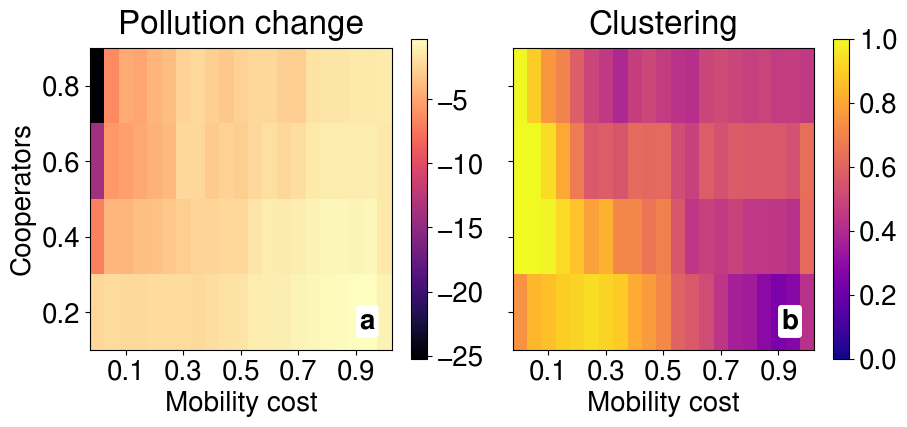

In [33]:
N=50
D=[N//5,2*N//5,3*N//5,4*N//5]
mu=np.arange(0,1.05,0.05)
# mu=np.arange(0,0.31,0.01)
runs=50
start=0 # either start with 0 or 1
lineplot = False # for A panel, use the lineplot or the heatmap

if max(mu)>0.5:
    pcp=np.loadtxt('../Data/Fixed Strategy/pcp_fin.csv').reshape(len(D),len(mu),runs)
    cc=np.loadtxt('../Data/Fixed Strategy/cc_fin.csv').reshape(len(D),len(mu),runs)
    mu_corners = np.diff(np.array([-0.05]+list(mu)+[1.05]))/2 + np.arange(-0.05,1.05,0.05)    
else:
    pcp=np.loadtxt('../Data/Fixed Strategy/N50pcp_fin_zoom.csv').reshape(len(D),len(mu),runs)
    cc=np.loadtxt('../Data/Fixed Strategy/N50cc_fin_zoom.csv').reshape(len(D),len(mu),runs)
    mu_corners = np.diff(np.array([-0.01]+list(mu)+[0.31]))/2 + np.arange(-0.01,0.31,0.01)
D_corners = [0.1,0.3,0.5,0.7,0.9]

mu_mesh,D_mesh = np.meshgrid(mu_corners,D_corners)

if lineplot:
    fig,axs = plt.subplots(figsize=(10,4),ncols=2,
                           sharex=True,
                           subplot_kw=dict(box_aspect=1))
    fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    hspace=0.06)
else:
    fig,axs = plt.subplots(figsize=(10,4),ncols=2,
                           sharex=True,
                           sharey=True,
                           subplot_kw=dict(box_aspect=1))
    fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.12,
                    hspace=0.06)
c_labels = ['Pollution change', 'Clustering']
metrics = [pcp,cc]
cmaps = ['magma','plasma']

vmins=[metrics[0][:,start:,:].mean(axis=-1).min(),0]
vmaxs=[metrics[0][:,start:,:].mean(axis=-1).max(),1]
letters=['a','b']
if lineplot:
    for i in range(4):
        axs[0].errorbar(mu[start:],np.mean(pcp[i,start:,:],axis=-1),
                        yerr=pcp[i,start:,:].std(axis=-1),label=labels[i],color=line_colors[i])
    axs[0].set_ylabel("Pollution change")
    axs[1].set_ylabel("Cooperators")
    axs[0].legend(loc='lower center',ncol=2,fontsize=10)
    if start == 1:
        axs[0].text(0.94*max(mu),-7.8,letters[0],va='center',ha='center',
                bbox=dict(boxstyle='round', fc="w",pad=0.1,ec='w'),weight='bold')
    else:
        axs[0].text(0.94*max(mu),-27,letters[0],va='center',ha='center',
                bbox=dict(boxstyle='round', fc="w",pad=0.1,ec='w'),weight='bold')
else:
    axs[0].set_ylabel("Cooperators") 
for i in range(int(lineplot),2):
    im=axs[i].pcolormesh(mu_mesh,1-D_mesh,metrics[i].mean(axis=-1),
                         cmap=cmaps[i],vmin=vmins[i],vmax=vmaxs[i])
    axs[i].set_yticks([0.2,0.4,0.6,0.8])
    cb=fig.colorbar(im,ax=axs[i])
    axs[i].set_title(c_labels[i],pad=10)
    axs[i].text(0.94*max(mu),0.175,letters[i],va='center',ha='center',
                bbox=dict(boxstyle='round', fc="w",pad=0.1,ec='w'),weight='bold')
for i in range(2):
    if max(mu) > 0.5:
        if start==1:
            axs[i].set_xticks([0.05,0.15,0.25])
        else:
            axs[i].set_xticks(np.arange(0.1,1,0.2))
        axs[i].set_xlim([start/100-0.025,1.025])
    else:
        if start==1:
            axs[i].set_xticks([0.05,0.15,0.25])
        else:
            axs[i].set_xticks([0,0.1,0.2,0.3])
        axs[i].set_xlim([start/100-0.005,0.305])
    axs[i].set_xlabel("Mobility cost")


fig.savefig(f"../Figures/Fixed Strategy/baseline_lowercasepanels.eps",bbox_inches='tight',format='eps')

## Figure S6

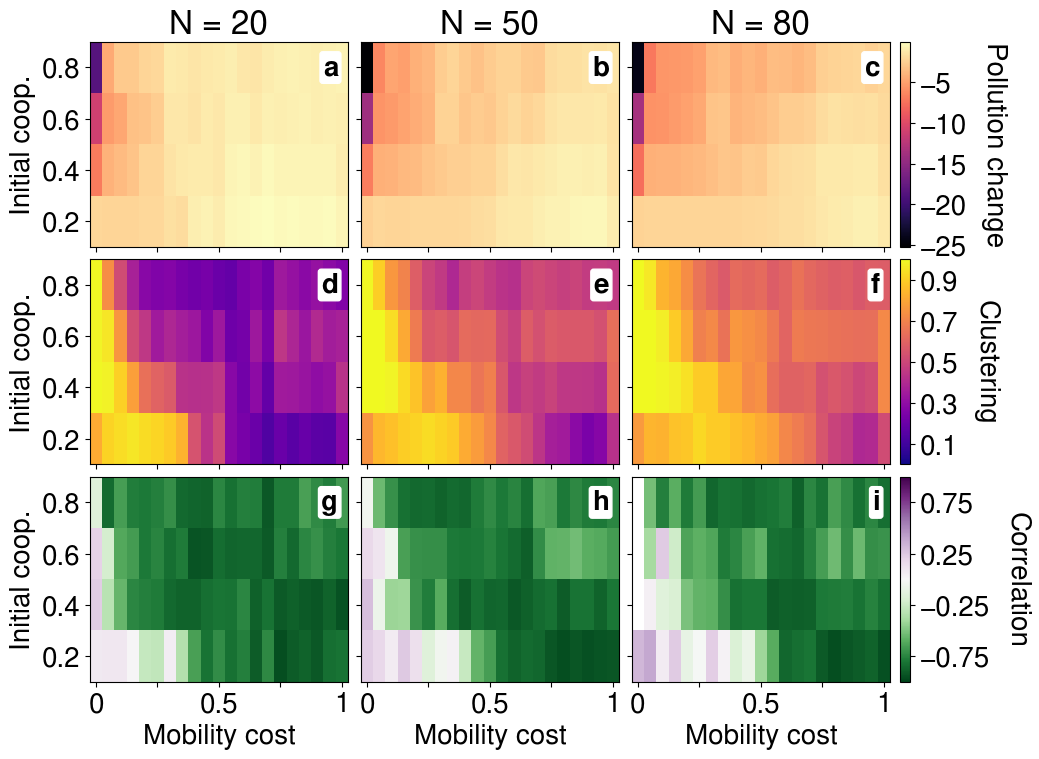

In [78]:
folder = '../Data/Fixed Strategy/'
N = [20,50,80]
mu=np.arange(0,1.05,0.05)
pcp= np.stack([np.loadtxt(folder+'N20pcp_fin.csv').reshape(len(D),len(mu),runs),
               np.loadtxt(folder+'pcp_fin.csv').reshape(len(D),len(mu),runs),
               np.loadtxt(folder+'N80pcp_fin.csv').reshape(len(D),len(mu),runs)],
              axis=0)
cc= np.stack([np.loadtxt(folder+'N20cc_fin.csv').reshape(len(D),len(mu),runs),
               np.loadtxt(folder+'cc_fin.csv').reshape(len(D),len(mu),runs),
               np.loadtxt(folder+'N80cc_fin.csv').reshape(len(D),len(mu),runs)],
              axis=0)
R = np.array([[[np.corrcoef(cc[i,j,k,:],pcp[i,j,k,:])[1,0] 
                for k in range(cc.shape[2])] 
               for j in range(cc.shape[1])] 
              for i in range(cc.shape[0])])

fig,axs=plt.subplots(nrows=3,ncols=3,sharex=True,sharey=True,figsize=(10,8))
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.05,
                    hspace=0.06)
cc_lims = [np.min(cc.mean(axis=-1)),np.max(cc.mean(axis=-1))]
pcp_lims = [np.min(pcp.mean(axis=-1)),np.max(pcp.mean(axis=-1))]

ims=[0,0,0]
for i in range(3):
    axs[0,i].set_title(f"N = {N[i]}",size='large')
    ims[0]=axs[0,i].pcolormesh(mu_mesh,1-D_mesh,np.mean(pcp[i],axis=-1),
                        cmap='magma',vmin=pcp_lims[0],vmax=pcp_lims[1])
    ims[1]=axs[1,i].pcolormesh(mu_mesh,1-D_mesh,np.mean(cc[i],axis=-1),vmin=0,vmax=1,cmap='plasma')
    ims[2]=axs[2,i].pcolormesh(mu_mesh,1-D_mesh,R[i],vmin=-1,vmax=1,cmap='PRGn_r')
    
    axs[2,i].set_xticks([0,0.25,0.5,0.75,1])
    axs[2,i].set_xticklabels([0,'',0.5,'',1])
    axs[i,0].set_yticks([0.2,0.4,0.6,0.8])
    axs[i,0].set_yticklabels([0.2,0.4,0.6,0.8])
    
cb=[0,0,0]
# c_labels=[r'$\bar{c}(T)$',r'$\bar{\Delta}\hat{P}$',r'$\bar{\kappa}$']
c_labels=['Pollution change','Clustering','Correlation']
letters='abcdefghi'
ctick_vals=[np.arange(-25,0,5),np.arange(0.1,1,0.2),np.arange(-0.75,1.1,0.5)]
for j in range(3):
#     axs[j,2].set_visible(False)
    pos = axs[j,-1].get_position()
    cax = fig.add_axes([pos.xmax+0.01,pos.ymin,
                       0.01,pos.ymax-pos.ymin])    
    cb[j]=fig.colorbar(ims[j],cax=cax,ticks=ctick_vals[j])
    cb[j].set_label(label=c_labels[j],rotation=-90,va='bottom',ha='center',labelpad=10)
#     cb[j].ax.tick_params(labelsize=10)
    
    axs[j,0].set_yticks([0.2,0.4,0.6,0.8])
    axs[j,0].set_yticklabels([0.2,0.4,0.6,0.8])
    axs[j,0].set_ylabel("Initial coop.")
    axs[-1,j].set_xlabel("Mobility cost")
    for i in range(3):
        axs[i,j].text(0.985,0.85,letters[i*3+j],va='top',ha='right',
                      bbox=dict(boxstyle='round', fc="w",pad=0.1,ec='w'),weight='bold')

fig.savefig('../Figures/Fixed Strategy/1cost-supp_lowercasepanels.eps',bbox_inches='tight',format='eps')

## Figure S7

In [63]:
folder='../Data/Fixed Strategy/'
N = 50
density_str = f'N{N}'
s = ['Two cost fixed mean/'+density_str+'/',
     'Two cost by strategy/'+density_str+'/']
means = ['04_','08_']
data={}
for m in means:
    pcp = np.loadtxt(folder+s[0]+m+'pcp.csv').reshape(4,len(np.arange(0,1.05,0.05)),50)
    pcp_type = np.loadtxt(folder+s[0]+m+'pcp_type.csv').reshape(2,2,4,len(np.arange(0,1.05,0.05)),50)
    cc = np.loadtxt(folder+s[0]+m+'cc.csv').reshape(4,len(np.arange(0,1.05,0.05)),50)
    cc_type = np.loadtxt(folder+s[0]+m+'cc_type.csv').reshape(2,2,4,len(np.arange(0,1.05,0.05)),50)
    R = np.array([[np.corrcoef(cc[i,j,:],pcp[i,j,:])[1,0] for j in range(cc.shape[1])] 
                  for i in range(cc.shape[0])])
    R_type = np.array([[[np.corrcoef((cc_type[k,i,j,:]),
                                        (pcp_type[k,i,j,:]))[1,0] 
                         for j in range(cc_type.shape[2])] 
                        for i in range(cc_type.shape[1])] 
                       for k in range(cc_type.shape[0])])
    R[np.isnan(R)] = 0
    R_type[np.isnan(R_type)]=0
    data['fm:'+m] = [pcp,pcp_type,cc,cc_type,R,R_type]
# for m in means:
#     pcp = np.loadtxt(folder+s[1]+m+'pcp.csv').reshape(4,len(np.arange(0,1.05,0.05)),50)
#     pcp_type = np.loadtxt(folder+s[1]+m+'pcp_type.csv').reshape(2,4,len(np.arange(0,1.05,0.05)),50)
#     cc = np.loadtxt(folder+s[1]+m+'cc.csv').reshape(4,len(np.arange(0,1.05,0.05)),50)
#     cc_type = np.loadtxt(folder+s[1]+m+'cc_type.csv').reshape(2,4,len(np.arange(0,1.05,0.05)),50)
#     R = np.array([[np.corrcoef(cc[i,j,:],pcp[i,j,:])[1,0] for j in range(cc.shape[1])] 
#                   for i in range(cc.shape[0])])
#     R_type = np.array([[[np.corrcoef((cc_type[k,i,j,:]),
#                                         (pcp_type[k,i,j,:]))[1,0] 
#                          for j in range(cc_type.shape[2])] 
#                         for i in range(cc_type.shape[1])] 
#                        for k in range(cc_type.shape[0])])
#     R[np.isnan(R)] = 0
#     R_type[np.isnan(R_type)]=0
#     data['bs:'+m] = [pcp,pcp_type,cc,cc_type,R,R_type]

D=[d for d in range(N//5,N,N//5)]
runs=50
mu_min=np.arange(0,1.05,0.05)
D_corners = [d/N for d in range(N//10,N,N//5)]
mu_rich_corners = np.diff(np.array([-0.05]+list(mu_min)+[1.05]))/2 + np.arange(-0.05,1.05,0.05)
mu_mesh,D_mesh = np.meshgrid(mu_rich_corners,D_corners)
mu_grid,D_grid = np.meshgrid(mu_min,D)

lims = [[min([np.nanmean(data[k][i],axis=-1).min() for k in data.keys()]),
         max([np.nanmean(data[k][i],axis=-1).max() for k in data.keys()])] for i in range(6)]
lims[-2:] = [[-1,1],[-1,1]]
# lims = [[-22,0],[0,0],[0.14,1],[0,0],[-1,1],[-1,1]]
print(lims)

[[-7.279385784577584, -0.4172154469480099], [-21.619205883051226, 0.42542293252771196], [0.3056, 0.89], [0.21176190476190473, 1.0], [-1, 1], [-1, 1]]


/home/jbara/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/jbara/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


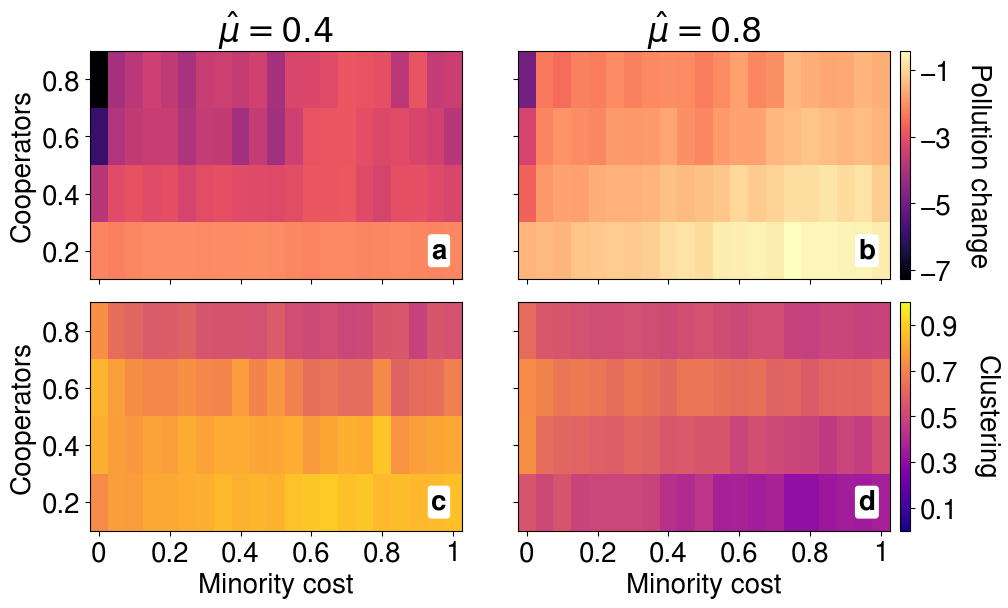

In [66]:
fig,axs=plt.subplots(figsize=(10,6),ncols=2,nrows=2,
                     sharex=True,sharey=True)
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.15,
                    hspace=0.1)
cmaps=['magma','plasma','PRGn_r']
labels = ['Pollution change','Clustering',r'$\rho(\Delta\hat{P},\kappa)$']
ims=[0,0,0]
mu_grid,D_grid=np.meshgrid(mu_min,D)
for i,k in enumerate(['fm:04_', 'fm:08_']):
    ims[0]=axs[0,i].pcolormesh(mu_mesh,1-D_mesh,np.nanmean(data[k][0],axis=-1),cmap=cmaps[0],
                        vmax=lims[0][1],vmin=lims[0][0]) # pcp
#     ims[0]=axs[0,i].pcolormesh(mu_mesh,1-D_mesh,
#                                np.nanmean(data[k][0],axis=-1)/(1-D_grid),
#                                cmap=cmaps[0])# log(pcp/c)
    ims[1]=axs[1,i].pcolormesh(mu_mesh,1-D_mesh,np.nanmean(data[k][2],axis=-1),cmap=cmaps[1],
                        vmin=0,vmax=1) # cc
    axs[-1,i].set_xticks(np.arange(0,1.1,0.2))
    axs[-1,i].set_xticklabels([0,0.2,0.4,0.6,0.8,1])
axs[0,0].set_title("$\hat{\mu}=0.4$",size='large')
axs[0,1].set_title("$\hat{\mu}=0.8$",size='large')
    
    
cb=[0,0,0]
ctick_vals=[np.arange(np.floor(lims[0][0])-1,np.ceil(lims[0][1])+1,2),
            np.arange(0.1,1.1,0.2)]
# ctick_labs=[np.arange(-8,0,1).tolist(),np.arange(0,1.1,0.1).tolist()]
# ctick_labs[0][1::2]=['']*len(ctick_labs[0][1::2])
# ctick_labs[1][0::2]=['']*len(ctick_labs[1][0::2])
for j in range(2):
#     axs[j,2].set_visible(False)
    pos = axs[j,-1].get_position()
    cax = fig.add_axes([pos.xmax+0.01,pos.ymin,
                       0.01,pos.ymax-pos.ymin])    
    cb[j]=fig.colorbar(ims[j],cax=cax,ticks=ctick_vals[j])
    cb[j].set_label(label=labels[j],size='medium',rotation=-90,va='bottom',ha='center',labelpad=10)
#     cb[j].ax.set_yticklabels(ctick_labs[j])
#     cb[j].ax.tick_params(labelsize=10)
    axs[j,0].set_yticks([0.2,0.4,0.6,0.8])
    axs[j,0].set_yticklabels([0.2,0.4,0.6,0.8])
    axs[j,0].set_ylabel("Cooperators")
    axs[1,j].set_xlabel("Minority cost")
axs[0,0].text(0.96,0.2,'a',va='center',ha='center',
              bbox=dict(boxstyle='round', fc="w",pad=0.1,ec='w'),weight='bold')
axs[0,1].text(0.96,0.2,'b',va='center',ha='center',
              bbox=dict(boxstyle='round', fc="w",pad=0.1,ec='w'),weight='bold')
axs[1,0].text(0.96,0.2,'c',va='center',ha='center',
              bbox=dict(boxstyle='round', fc="w",pad=0.1,ec='w'),weight='bold')
axs[1,1].text(0.96,0.2,'d',va='center',ha='center',
              bbox=dict(boxstyle='round', fc="w",pad=0.1,ec='w'),weight='bold')

fig.savefig(f'../Figures/Fixed Strategy/N{N}_two_cost_fixed_mean_lowercasepanels.eps',bbox_inches='tight',format='eps')

## Figure S8-9

In [59]:
N=[20,50,80]
mu_mean = 0.8
folder = f'../Data/Imitation/Two Costs/'

runs=200
D = np.arange(0.1,1,0.1).tolist()
mu_m=np.arange(0,1.05,0.05)

pcp=np.stack([np.loadtxt(folder+f'N{n}/0{mu_mean*10}pcp.csv').reshape((len(D),len(mu_m),runs)) 
              for n in N])
cc=np.stack([np.loadtxt(folder+f'N{n}/0{mu_mean*10}cc.csv').reshape((len(D),len(mu_m),runs)) 
             for n in N])
c_rate=np.stack([np.loadtxt(folder+f'N{n}/0{mu_mean*10}c_rate.csv').reshape((len(D),len(mu_m),runs))/n 
                 for n in N])
type_cc=np.stack([np.loadtxt(folder+f'N{n}/0{mu_mean*10}type_cc.csv').reshape((2,2,len(D),len(mu_m),runs)) 
                  for n in N])
minority_c_rate=np.stack([np.loadtxt(folder+f'N{n}/0{mu_mean*10}minority_c_rate.csv').reshape((len(D),
                                                                                   len(mu_m),
                                                                                   runs))/n 
                          for n in N])

minority_c_rate[:,:,mu_m==mu_mean,:] *= 0.2
# minority_c_rate[1,:,mu_m==0.8,:] *= 0.2

D_corners = np.array([0]+D)+0.05
mu_corners = np.diff(np.array([-0.05]+list(mu_m)+[1.05]))/2 + np.arange(-0.05,1.05,0.05)
mu_mesh,D_mesh = np.meshgrid(mu_corners,D_corners)
mu_grid,D_grid=np.meshgrid(mu_m,D)

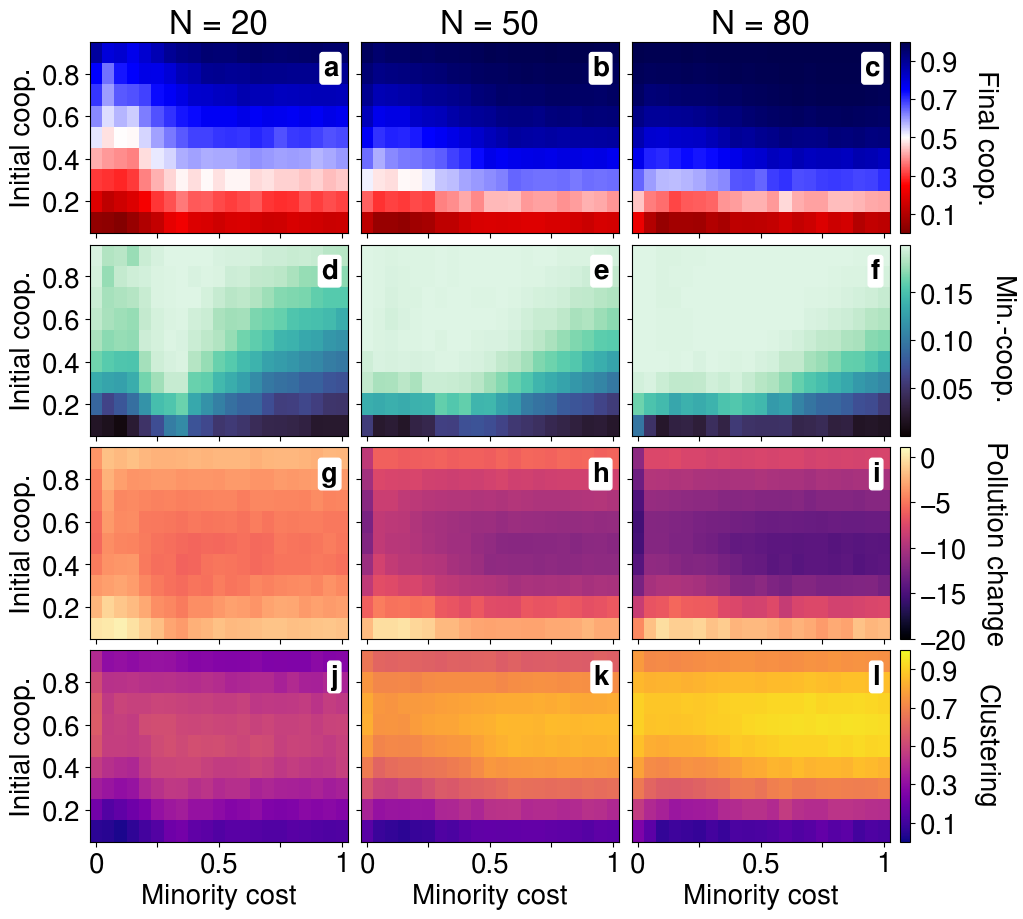

In [60]:
fig,axs=plt.subplots(nrows=4,ncols=3,sharex=True,sharey=True,figsize=(10,10))
fig.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.05,
                    hspace=0.06)
c_rate_lims = [np.min(c_rate.mean(axis=-1)),np.max(c_rate.mean(axis=-1))]
cc_lims = [np.min(cc.mean(axis=-1)),np.max(cc.mean(axis=-1))]
pcp_lims = [np.min(pcp.mean(axis=-1)),np.max(pcp.mean(axis=-1))]

ims=[0]*4

cm_palette = sns.color_palette("mako", as_cmap=True)
# cm_palette.reverse()
for i in range(3):
    axs[0,i].set_title(f"N = {N[i]}")
    ims[0]=axs[0,i].pcolormesh(mu_mesh,1-D_mesh,np.mean(c_rate[i],axis=-1),
                        cmap='seismic_r',vmin=0,vmax=1)
    ims[1]=axs[1,i].pcolormesh(mu_mesh,1-D_mesh,np.mean(minority_c_rate[i],axis=-1),
                        cmap=cm_palette,vmin=0,vmax=0.2)
    ims[2]=axs[2,i].pcolormesh(mu_mesh,1-D_mesh,np.mean(pcp[i],axis=-1),
                        cmap='magma',vmin=-20,vmax=1)
    ims[3]=axs[3,i].pcolormesh(mu_mesh,1-D_mesh,np.mean(cc[i],axis=-1),vmin=0,vmax=1,cmap='plasma')
    
    axs[-1,i].set_xticks([0,0.25,0.5,0.75,1])
    axs[-1,i].set_xticklabels([0,'',0.5,'',1])
    axs[-1,i].set_xlabel('Minority cost')
    
cb=[0]*4
# c_labels=[r'$\bar{c}(T)$',r'$\bar{c}_m(T)$',r'$\Delta\hat{P}$','$\kappa$']
c_labels=['Final coop.','Min.-coop.','Pollution change','Clustering']
letters=['a','b','c',
         'd','e','f',
         'g','h','i',
         'j','k','l']
ctick_vals=[np.arange(0.1,1,0.2),np.arange(0.05,0.19,0.05),np.arange(-20,1,5),np.arange(0.1,1,0.2)]
for j in range(4):
#     axs[j,2].set_visible(False)
    pos = axs[j,-1].get_position()
    cax = fig.add_axes([pos.xmax+0.01,pos.ymin,
                       0.01,pos.ymax-pos.ymin])    
    cb[j]=fig.colorbar(ims[j],cax=cax,ticks=ctick_vals[j])
    cb[j].set_label(label=c_labels[j],rotation=-90,va='bottom',ha='center',labelpad=10)
#     cb[j].ax.tick_params(labelsize=10)
    axs[j,0].set_yticks([0.2,0.4,0.6,0.8])
    axs[j,0].set_yticklabels([0.2,0.4,0.6,0.8])
    axs[j,0].set_ylabel('Initial coop.')
    for i in range(3):
        axs[j,i].text(0.985,0.825,letters[j*3+i],va='center',ha='right',
                      bbox=dict(boxstyle='round', fc="w",pad=0.1,ec='w'),weight='bold')
        
        
# ax_outer=fig.add_subplot(111, frameon=False)
# plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
# # plt.xlabel("common X",fontsize='medium')
# plt.ylabel(r"Initial Cooperators, $c(0)$",size='medium')
# plt.xlabel("Minority cost, $\mu_m$",size='medium')
# fig.savefig(f"Figures/Imitation/two_cost_mu0{int(mu_mean*10)}.png",bbox_inches='tight')
fig.savefig(f"../Figures/Imitation/two_cost_mu0{int(mu_mean*10)}_lowercasepanels.eps",format='eps',bbox_inches='tight')